Resolvi escolher o data set por experiência do própia, já que quando pequeno eu jogava pókemons em diferentes dispositivos e trocava com amigos para possuir o melhor time possível.

Escolher um dataset da lista do professor


https://www.kaggle.com/datasets/thiagoazen/all-pokemon-with-stats

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
url = 'https://github.com/RafaelMoraesCruz/Pokemon-Probabilidade-e-Estat-stica/blob/main/PokemonDb.csv'
df = pd.read_html('https://github.com/RafaelMoraesCruz/Pokemon-Probabilidade-e-Estat-stica/blob/main/PokemonDb.csv')
df = df[0]
universo = len(df)

visualização inicial do dataset, para melhor entendimento

In [ ]:
df.head(10)

,Name,Variation,Type1,Type2,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed
0,Bulbasaur,NaN,Grass,Poison,318,45,49,49,65,65,45
1,Ivysaur,NaN,Grass,Poison,405,60,62,63,80,80,60
2,Venusaur,NaN,Grass,Poison,525,80,82,83,100,100,80
3,Venusaur,Mega,Grass,Poison,625,80,100,123,122,120,80
4,Charmander,NaN,Fire,NaN,309,39,52,43,60,50,65
5,Charmeleon,NaN,Fire,NaN,405,58,64,58,80,65,80
6,Charizard,NaN,Fire,Flying,534,78,84,78,109,85,100
7,Charizard,Mega X,Fire,Dragon,634,78,130,111,130,85,100
8,Charizard,Mega Y,Fire,Flying,634,78,104,78,159,115,100
9,Squirtle,NaN,Water,NaN,314,44,48,65,50,64,43


# Tratamento de dados

Tratamento de dados são essenciais para o estudo de qualquer coleção de dados, por isso é necessário observar quais são os dados fundamentais para o estudo e os que não são para que com isso chegue-se ao resultado exato e limpo

In [ ]:
df.describe()

,Unnamed: 0,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed
count,0.0,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000
mean,NaN,441.261438,70.366947,80.945845,74.864613,73.422969,72.481793,69.179272
std,NaN,121.610604,26.646330,32.385281,31.170939,32.840700,28.012037,30.229644
min,NaN,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,NaN,330.000000,50.000000,56.500000,52.000000,50.000000,50.000000,45.000000
50%,NaN,460.000000,68.000000,80.000000,70.000000,65.000000,70.000000,65.000000
75%,NaN,517.500000,84.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,NaN,1125.000000,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000


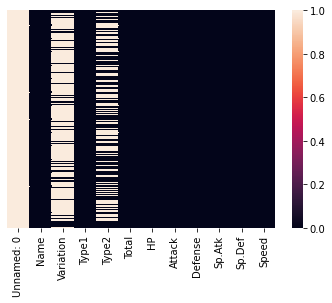

In [ ]:
import seaborn as sns

sns.heatmap(df.isnull(), yticklabels=False)

Como o type 2 faz sentido conter valores nulos, pois o pokemon pode possuir só um tipo, ele não será tratado. Voltaremos a atenção para Variation

In [ ]:
# df.Variation.head(50)
df.Variation.tail(50)

1021                     NaN
1022                     NaN
1023                     NaN
1024                     NaN
1025                     NaN
1026           Crowned Sword
1027    Hero of Many Battles
1028          Crowned Shield
1029    Hero of Many Battles
1030                     NaN
1031               Eternamax
1032                     NaN
1033           Single Strike
1034            Rapid Strike
1035                     NaN
1036                     NaN
1037                     NaN
1038                     NaN
1039                     NaN
1040                     NaN
1041               Ice Rider
1042            Shadow Rider
1043                 Hisuian
1044                     NaN
1045                 Hisuian
1046                     NaN
1047                 Hisuian
1048                 Hisuian
1049                 Hisuian
1050                 Hisuian
1051                 Hisuian
1052                 Hisuian
1053                 Hisuian
1054                 Hisuian
1055          

Variation seria uma coluna parecida com 'informacoes gerais/ sexo/ isMega/título' onde a mesma possui varias informações de dados.

In [ ]:
df['Unnamed: 0'].isna()

0       True
1       True
2       True
3       True
4       True
        ... 
1066    True
1067    True
1068    True
1069    True
1070    True
Name: Unnamed: 0, Length: 1071, dtype: bool

In [ ]:
df = df.drop(['Unnamed: 0'],axis=1)

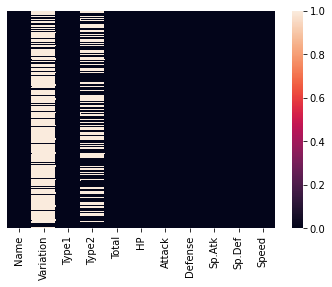

In [ ]:
sns.heatmap(df.isnull(), yticklabels=False)

'electric' está escrito errado em type 1

In [ ]:
df.loc[1048,'Type1'] = 'Electric'

# Qual a probabilidade de escolher um pokemon e seu type1 ou type2 ser Grass?

quando estava jogando, sempre perdi muito tempo passando pelos matos do jogo e a maioria de seus pokemons eram de planta, por isso fiz esse código para achar a probabilidade de pego randomicamente um pokemon, qual a probabilidade de ser de planta. Sei que existem algoritimos no jogo que afetam a raridade de um pokemon, mas como não se tem acesso a eles...

In [ ]:
df1 = df
probG = len(df1[(df1['Type1'] == "Grass") | (df1['Type2'] == "Grass")])/ universo
print (f"{round(probG *100,2)} %")

11.48 %


# Qual a probabilidade de escolher um pokemon ofensivo? onde o ataque é maior que a defesa.

sempre gostei mais de pokémons que tivessem mais ataque do que defesa (sempre escolhia charmander), fiz esse estudo para ver onde a maioria dos pokémons estavam concentrados.

In [ ]:
ofensivo = len(df[df['Attack'] > df['Defense']])
prob_ofensivo = round((ofensivo/universo)*100,2)
print(f'a probabilidade de um pokémon ser escolhido aleatoriamente e ser agressivo é de : {prob_ofensivo}%')

a probabilidade de um pokémon ser escolhido aleatoriamente e ser agressivo é de : 54.62%


# Qual a probabilidade de ser um pokemon com type 1 = dragon, sabendo que seu type 2 é fire

uma coisa que se tem preenchido na cabeça é a relação que todo dragão é de fogo, fui um pouco mais e vi qual a % dos pokémons de fogo que realmente são dragões

In [ ]:
probT2Fire = len(df[df['Type2'] == 'Fire'])/universo
probDragT2Fire = len(df[(df['Type2'] == 'Fire') & (df['Type1'] == 'Dragon')])/universo
prob = probDragT2Fire/probT2Fire
prob = round(prob*100,2)
print(f'a probabilidade de um pokémon ser um pokemon type1=dragon, sabendo que seu type2=fire é de: {prob}%')


a probabilidade de um pokémon ser um pokemon type1=dragon, sabendo que seu type2=fire é de: 5.88%


# TEOREMA DE BAYES

qual a probabilidade de ser bug, tal que um dos seus tipos seja grass.
recorremos a história dos pokémons selvagens(mato) onde ficava irritado quando procurava por um pokémon bom como um abra (posteriormente alakazam) e só o que encontrava era caterpie.

In [ ]:
probBG = len(df[((df['Type1'] == "Bug") | (df['Type2'] == 'Bug')) & ((df['Type1'] == 'Grass') | (df['Type2'] == 'Grass'))])/ universo
probCond = probBG/probG
probBugTqGrass = (probCond * probBG)/probG
print(f'{round(probBugTqGrass * 100,2)}%')

0.24%


# Variáveis aleatórias

estatística com a função de quantos pokémons existem de cada tipo (type1 + type2)

In [ ]:
va = df.copy()
vat1 = va['Type1'].value_counts()
vat2 = va['Type2'].value_counts()
vat = vat1 + vat2
vat

Bug          91
Dark         75
Dragon       77
Electric     74
Fairy        65
Fighting     78
Fire         85
Flying      123
Ghost        73
Grass       123
Ground       81
Ice          58
Normal      130
Poison       83
Psychic     123
Rock         78
Steel        74
Water       159
dtype: int64

# função probabilidade

In [ ]:
fp = vat/universo
fp = fp.sort_values(ascending=False)
fp

Water       0.148459
Normal      0.121382
Flying      0.114846
Psychic     0.114846
Grass       0.114846
Bug         0.084967
Fire        0.079365
Poison      0.077498
Ground      0.075630
Fighting    0.072829
Rock        0.072829
Dragon      0.071895
Dark        0.070028
Electric    0.069094
Steel       0.069094
Ghost       0.068161
Fairy       0.060691
Ice         0.054155
dtype: float64

# gráfico de probabilidade Type

<BarContainer object of 18 artists>

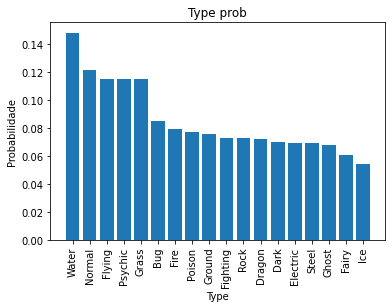

In [ ]:
plt.xlabel('Type')
plt.ylabel('Probabilidade')
plt.title('Type prob')
plt.xticks(rotation = 90)
plt.bar(fp.index,fp)


# Variação quanto ao total

organizando em grupos, Gostaria de saber por força como estão divididos os pokémons

In [ ]:
df0 = df.copy()
def pokemonPowerCounter(df):
  pokemonList=[]
  for i in range(0,1001,100):
    if i < 100:
      size = len(df[df['Total'] < 100])
    elif 100 <= i <1000:
      size = len(df[(df['Total'] >= i) & (df['Total'] < i+100)])
    else:
      size = len(df[df['Total'] >= 1000])
    pokemonList.append(size)
  return pokemonList

def pokemonPowerName():
  pokemonListName=[]
  for i in range(0,1001,100):
    if i < 1000:
      # pokemonListName.append("%d_%d"%(i,i+100))
      pokemonListName.append(f"{i}_{i+100}")
    else:
      pokemonListName.append(f">{i}")
  return pokemonListName

d = {'Total': pokemonPowerName(),'Quantidade': pokemonPowerCounter(df0)}
df2 = pd.DataFrame(data=d)
df3 = df2.set_index('Total')
df3

,Quantidade
Total,
0_100,0
100_200,10
200_300,126
300_400,235
400_500,345
500_600,242
600_700,93
700_800,19
800_900,0


o ideal seria montar um time com os pokemons com força total entre as forças 600-800, claro que existem outras variáveis nessa escolha, já que seria muito ruim montar um time com todos os pokémons do mesmo tipo, o time ficaria vulnerável, já que alguns tipos possuem vantagem uns sobre outros

Gráfico

Text(0, 0.5, 'Quantidade')

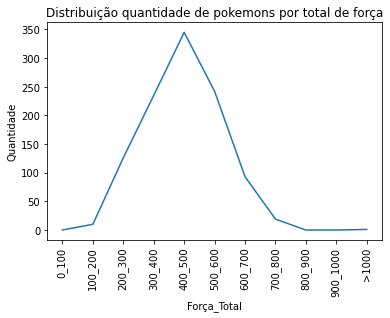

In [ ]:
plt.plot(df3)
plt.title('Distribuição quantidade de pokemons por total de força')
plt.xticks(rotation = 90)
plt.xlabel('Força_Total')
plt.ylabel('Quantidade')

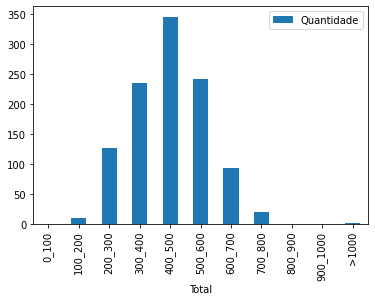

In [ ]:
df2.plot.bar(x= 'Total',y = 'Quantidade')


Gráfico acumulativo

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 <a list of 11 Text major ticklabel objects>)

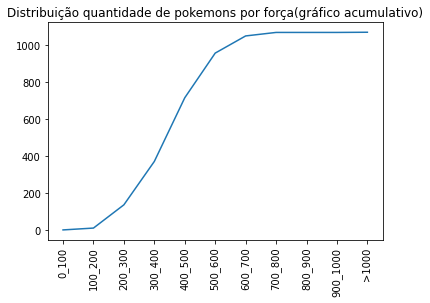

In [ ]:
df3cumsum = df3.cumsum()
plt.plot(df3cumsum)
plt.title('Distribuição quantidade de pokemons por força(gráfico acumulativo)')
plt.xticks(rotation = 90)

# Correlação

Qual o atributo que tem maior contribuição para o atributo Total

In [ ]:
corr = df.copy()
corr.columns

Index(['Name', 'Variation', 'Type1', 'Type2', 'Total', 'HP', 'Attack',
       'Defense', 'Sp.Atk', 'Sp.Def', 'Speed'],
      dtype='object')

In [ ]:
corr = df.copy()

# Correlação atributo x Total
print(f"correlação entre Total e HP: {round(corr[['Total','HP']].corr()['HP'][0],3)}")
print(f"correlação entre Total e Attack: {round(corr[['Total','Attack']].corr()['Attack'][0],3)}")
print(f"correlação entre Total e Defense: {round(corr[['Total','Defense']].corr()['Defense'][0],3)}")
print(f"correlação entre Total e Sp.Atk: {round(corr[['Total','Sp.Atk']].corr()['Sp.Atk'][0],3)}")
print(f"correlação entre Total e Sp.Def: {round(corr[['Total','Sp.Def']].corr()['Sp.Def'][0],3)}")
print(f"correlação entre Total e Speed: {round(corr[['Total','Speed']].corr()['Speed'][0],3)}")

correlação entre Total e HP: 0.651
correlação entre Total e Attack: 0.733
correlação entre Total e Defense: 0.628
correlação entre Total e Sp.Atk: 0.73
correlação entre Total e Sp.Def: 0.719
correlação entre Total e Speed: 0.557


In [ ]:
# Média dos atributos
print(corr['HP'].mean())
print(corr['Attack'].mean())
print(corr['Defense'].mean())
print(corr['Sp.Atk'].mean())
print(corr['Sp.Def'].mean())
print(corr['Speed'].mean())

70.36694677871148
80.94584500466853
74.86461251167134
73.42296918767506
72.48179271708683
69.17927170868347


faz sentido que o 'attack' possua uma correlação maior com o total, já que sua média é maior e o atribudo 'speed' tenha uma correlação menor, sabendo que a soma dos atributos vai resultar no 'total'

# Distribuição

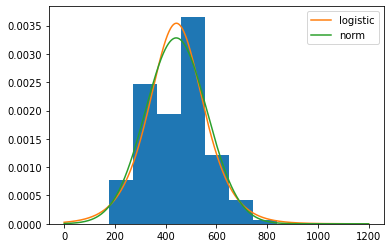

In [ ]:
import scipy
import scipy.stats
size=1200
x = np.arange(size)
y = df['Total']
h = plt.hist(y, density=True)

dist_names = ['logistic', 'norm']
for dist_name in dist_names:
  dist = getattr(scipy.stats, dist_name)
  params = dist.fit(y)
  arg = params[:-2]
  loc = params[-2]
  scale = params[-1]
  if arg: 
    pdf_fitted = dist.pdf(x, *arg, loc=loc, scale=scale)
  else:
    pdf_fitted = dist.pdf(x, loc=loc, scale=scale)
  plt.plot(pdf_fitted, label=dist_name)

plt.legend(loc= 'upper right')

distribuição das forças dos pokémons, para melhor visualização a elaboração de um gráfico

# Estatística Descritiva

Histrograma

In [ ]:
import plotly.express as px

fig = px.histogram(df, x='Total', marginal='rug',title='Distribuição das forças(Total) entre os pokémons')
fig.show()

Box Plot

In [ ]:
fig2 = px.box(df, x=['Type1','Type2'], y='Total',title="Stats Total by type")
fig2.show()

gráfico bem importante, porque representa a distribuição de forças por tipo, assim pode se ter uma ideia dos tipos mais fortes, já de cara nota-se que os tipos de 'grass' e 'bug' apresentam muitos pokémons considerados fracos enquanto que o tipo 'dragon' apresentam os pokémons mais fortes.

<strong>Notável a presença de um outlier bem expressivo</strong>

In [ ]:
df[df['Total'] == 1125]

,Unnamed: 0,Name,Variation,Type1,Type2,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed
1031,NaN,Eternatus,Eternamax,Poison,Dragon,1125,255,115,250,125,250,130


<img src='https://assets.pokemon.com/assets/cms2/img/pokedex/full/890.png'>

Scatter plot attack

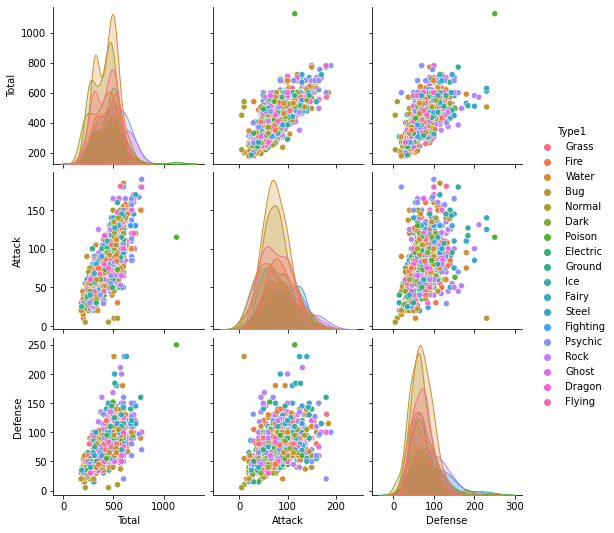

In [ ]:
import seaborn as sns
col=['Total', 'Attack','Defense','Type1']

sns.pairplot(df[col],hue="Type1")

aqui mais um pouco do estudo da correlação, podemos ver que os valores de total são mais bem correlacionados com attack do que com defense

heatmap

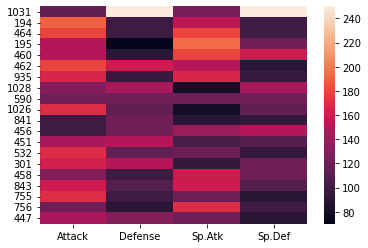

In [ ]:
import seaborn as sns
col=['Attack', 'Defense', 'Sp.Atk', 'Sp.Def']
dfs = df.sort_values(by="Total",ascending=False)


sns.heatmap(dfs.head(20)[col])

dentre os 10 pokémons mais fortes, a maioria representa um attack maior do que a defesa, mais uma vez representando a força da correlação

# 3 distribuição amostral

embaralhando o dataframe

In [ ]:
dfShuffle = df.sample(frac = 1)
dfShuffle["Total"].mean()

441.26143790849676

amostra com 357 pokemons 200 amostras

In [ ]:
means = []
mediaGeral = 0
for media in range(200):
  amostra = np.random.randint(0,1071,357)
  mediaAmostra = df.loc[amostra]['Total'].mean()
  means.append(mediaAmostra)
  mediaGeral += mediaAmostra
mediaGeral/200



439.7048459383753

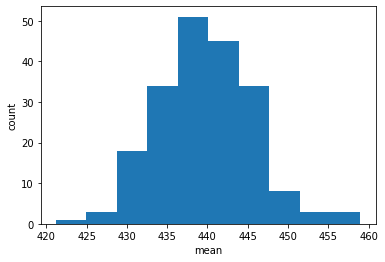

In [ ]:
plt.hist(means)
plt.xlabel('mean')
plt.ylabel('count')
plt.show()


amostra com 119 pokemons 200 amostras

In [ ]:
means = []
mediaGeral = 0
for media in range(200):
  amostra = np.random.randint(0,1071,119)
  mediaAmostra = df.loc[amostra]['Total'].mean()
  means.append(mediaAmostra)
  mediaGeral += mediaAmostra
mediaGeral/200


441.16277310924374

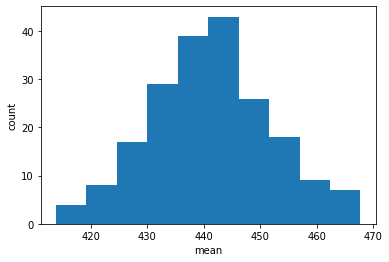

In [ ]:
plt.hist(means)
plt.xlabel('mean')
plt.ylabel('count')
plt.show()

amostra com 17 pokemons e 200 amostras

In [ ]:
means = []
mediaGeral = 0
for media in range(200):
  amostra = np.random.randint(0,1071,17)
  mediaAmostra = df.loc[amostra]['Total'].mean()
  means.append(mediaAmostra)
  mediaGeral += mediaAmostra
mediaGeral/200

442.33588235294127

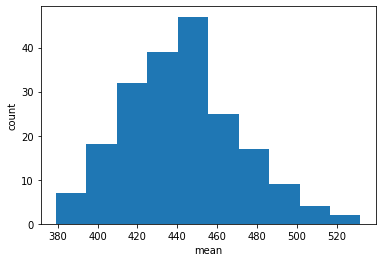

In [ ]:
plt.hist(means)
plt.xlabel('mean')
plt.ylabel('count')
plt.show()

# Intervalo de confiança (95%)

In [ ]:
x1 = (df['Total'].std() * 1.96) + df['Total'].mean()
print(f'x1 = {round(x1,0)}')
x2 = (df['Total'].std() * (-1.96)) + df['Total'].mean()
print(f'x2 = {round(x2,0)}')

x1 = 680.0
x2 = 203.0


valores dentro do intervalo de confiança

In [ ]:
dfc = df[(df['Total'] <= x1) & (df['Total'] >= x2)]

fig = px.histogram(dfc, x='Total', marginal='rug')
fig.show()

respresentação do intervalo de confiança de 95% de acordo com seus totais.

# Intervalo de confiança (90%)

In [ ]:
x1 = (df['Total'].std() * 1.645) + df['Total'].mean()
print(f'x1 = {round(x1,0)}')
x2 = (df['Total'].std() * (-1.645)) + df['Total'].mean()
print(f'x2 = {round(x2,0)}')

x1 = 641.0
x2 = 241.0


valores dentro do intervalo de confiança

In [ ]:
dfc = df[(df['Total'] <= x1) & (df['Total'] >= x2)]

fig = px.histogram(dfc, x='Total', marginal='rug')
fig.show()

respresentação do intervalo de confiança de 95% de acordo com seus totais.